In [31]:
import json
from collections import defaultdict as dd
import matplotlib.pyplot as plt
fp = open('result.json')
f = open('repo_lambda_count.json')
f1 = open('comments.json')
repo_count_str = f.read()
result_str = fp.read()
comments_str = f1.read()
result_data = json.loads(result_str)
repo_count_data = json.loads(repo_count_str)
comments_data = json.loads(comments_str)

In [32]:
python_files = []
final_result_data = {}
temp = []
for i in repo_count_data:
    try:
        final_result_data[i]=result_data[i]
    except:
        temp.append(i)
        continue
l = 0    
for i in repo_count_data:
    if repo_count_data[i]>0:
        l+=1
print("lambda count: ",sum(repo_count_data.values()))
print("Fraction of comments: ",sum(comments_data.values())/sum(repo_count_data.values()))
print("Repo's with atleast one lambda: ",l )
print("Fraction of repo's with atleast one lambda", l/len(repo_count_data))
for i in temp:
    del repo_count_data[i]

star_count = {}
lambda_count = {}

for i in repo_count_data:
    if final_result_data[i][len(final_result_data[i])-1]=='k':
        star_count[i] = float(final_result_data[i][:-1])
    else:
        star_count[i] = float(final_result_data[i])/1000
    lambda_count[i] = repo_count_data[i]

lambda count:  34472
Fraction of comments:  0.07728011139475516
Repo's with atleast one lambda:  594
Fraction of repo's with atleast one lambda 0.7857142857142857


Text(0, 0.5, 'Number of occurrences of lambda')

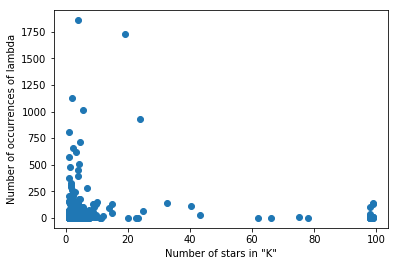

In [4]:
plt.scatter(list(star_count.values()),list(lambda_count.values()))
plt.xlabel('Number of stars in "K"')
plt.ylabel('Number of occurrences of lambda')

In [27]:
key_values = {}
for i in lambda_count:
    key_values[i] = (star_count[i],lambda_count[i])
#print(key_values.values())
#print(sorted(key_values.items(), key = lambda kv:(kv[1], kv[0]))) 

In [5]:
X = list(star_count.values())
y = list(lambda_count.values())
#print(y)

for i in range(len(X)):
    X[i] = X[i]*1000
#print(X)

16161.203732639875


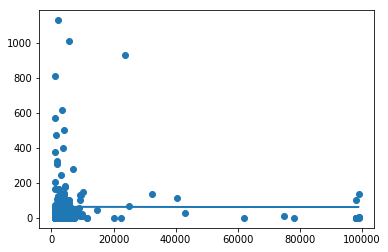

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
X,y = np.array(X),np.array(y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)
print(mean_squared_error(y_test, y_predict))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.19382022471910113


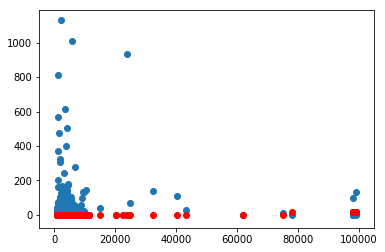

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
X,y = np.array(X),np.array(y)
X = X.reshape(-1,1)
y = y.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=0)
reg = LogisticRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)
print(accuracy_score(y_test, y_predict))
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_predict,color="red")

In [8]:
# Code for creating table for range of lambda count and number of repositories 

In [9]:
import json
from collections import defaultdict as dd
import matplotlib.pyplot as plt
f = open('repo_lambda_count.json')
repo_count_str = f.read()
repo_count_data = json.loads(repo_count_str)

In [10]:
x = [i for i in range(0,20)]
lambda_count  = {}
for i in range(0,20):
    lambda_count[i]=0
for i in repo_count_data:
    j = int(repo_count_data[i]/100)
    if j in lambda_count.keys():
        lambda_count[j]+=1
    else:
        lambda_count[j]=1
print(lambda_count)

{0: 676, 1: 44, 2: 11, 3: 7, 4: 5, 5: 4, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 1, 18: 1, 19: 0}


In [11]:
max(repo_count_data.values())

1858

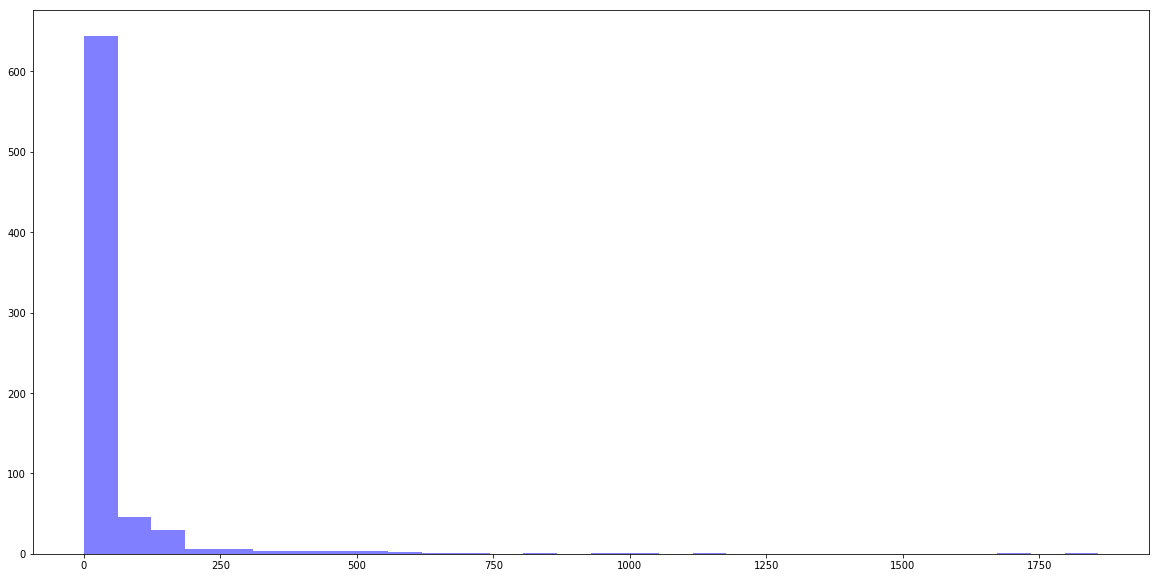

In [12]:
import matplotlib.pyplot as plt
x = repo_count_data.values()
num_bins = 30
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()